## Final Project Submission

Please fill out:
* Student name: Fahima Hyder
* Student pace: self paced / part time / full time: Part Time
* Scheduled project review date/time: December 19, 2018. 1015a,
* Instructor name: Jeff Herman
* Blog post URL: https://fhyder.github.io/the_trials_and_tribulations_of_my_final_project_for_module_1


In [1]:
#Let's import all the libraries we love :) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


In [2]:
#Now lets load our data into a readable dataframe using pandas

df = pd.read_csv('kc_house_data.csv')
df.head() # lets see what we're working with 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Essential info on columns (before any manipulation):

1) **id:** a notation for a house

2) **date:** Date house was sold

3) **price:** Price is prediction target

4) **bedrooms:** Number of Bedrooms/House

5) **bathrooms:** Number of bathrooms/bedrooms

6) **sqft_living:** square footage of the home

7) **sqft_lot:** square footage of the lot

8) **floors:** Total floors (levels) in house

9) **waterfront:** House which has a view to a waterfront

10) **view:** Has been viewed

11) **condition:** How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent. 

12) **grade:** Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.

13) **sqft_above:** Square footage of house apart from basement

14) **sqft_basement:** Square footage of the basement

15) **yr_built:** Year built

16) **yr_renovated:** Year when house was renovated

17) **zipcode:** zipcode

18) **lat:** Latitude coordinate

19) **long:** Longitude coordinate

20) **sqft_living15:** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

21) **sqft_lot15:** lotSize area in 2015(implies-- some renovations)

## Before analyzing any of the data let's make sure that we clean the set to account for any missing values or placeholder variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We see here that we have two columns that are cast as objects (strings). Date can be cast as a string but I assume that sqft_basement should be presented as numbers and not strings. Just to be sure lets observe the unique values of sqft_basement. 

In [5]:
df.sqft_basement.unique()


array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Upon observation, our unique values confirm that a bunch of number values has been cast as strings and need to be changed to floats. However, I also noticed that one of the values present is '?'. This variable needs to be dealt with. First, lets see how many ?'s are actually present in the series before deciding our strategy in eliminating them

In [6]:
question_count = 0
for i in df.sqft_basement:
    if i == '?':
        question_count += 1
question_count   
#only 454....lets replace with median or mode


454

Of 21,597 entries only 454 of them are '?' in the sqft_basement series. It's safe to assume that changing these values to the mean of the series won't effect the outcome of the data much. In order to proceed we must find the median of the series. I will create a copy of the series with the ?'s eliminated, cast it as a float, and then determine the median of the set. I'll then replace all the ?'s in our original dataframe with the median of the series.

In [7]:
non_q = df.loc[df['sqft_basement']!='?']

In [8]:
non_q.sqft_basement.unique() #checks for ?s

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [9]:
sqft = non_q.sqft_basement.astype(float)

mn = sqft.mean()
md = sqft.mode()
mdn = sqft.median()
mn, md, mdn

print('Mean:', mn, 'Median:', mdn, 'Mode:', md)
# okay so lets make all the ? in 0

Mean: 291.851723974838 Median: 0.0 Mode: 0    0.0
dtype: float64


In [10]:
df.sqft_basement.replace(to_replace = '?', value = '0.0', inplace=True) # wonder if this workedddddd

In [11]:
df.sqft_basement.unique() ### yay now lets cast it as a float

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [12]:
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement.dtype # okay that worked lets see how much the mean is affected

dtype('float64')

In [13]:
df.sqft_basement.mean(), mn

#great! not much at all okay lets check the date anyway

(285.7165810066213, 291.851723974838)

In [14]:
df.date.head() # I feel comfortable leaving this series this as an object. okay now lets check for null values

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Okay so our sqft_basement has been cast as a float and the ?'s have been replaced with the median. However, it is clear that there is data missing in the waterfront, view, and yr_renovated series. Let's do some more exploratory analysis to figure out how to manipulate these series

In [16]:
df.isna().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For view, the null values are so small compared to the entire series that it is safe to assume that replacing them with median values won't have skew the results of the series much. However, null values in yr_renovated and waterfront are much higher so before using the same method I'd like to see what type of consequences doing so will have on the mean. 

In [17]:
df.floors.fillna(df.floors.median())

df.floors.isna().sum()


0

In [18]:
viewmn = df.view.mean()
df.view.median()
testview = df.view.fillna(0.0)
viewmn, testview.mean() # if I round to a 3 digits the mean is more or less the same so lets test with waterfront also

(0.23386272870808952, 0.23318053433347224)

In [19]:
# okay lets start by checking unique values because this seems like categorical data that represent boolean values
print('These are the unique values of waterfront:' + f'{df.waterfront.unique()}')
# okay seems to me that it's a true or false sort of value...perhaps best to just replace the nan with false? lets check md first

df.waterfront.mode()
#so it's safe to say that most of these don't have a waterfront view....I feel okay with replacing NAN with 0 since only about 11% of the full set is NAN in this series
df.waterfront.median() # just to be safe



These are the unique values of waterfront:[nan  0.  1.]


0.0

In [20]:
df.waterfront = df.waterfront.fillna(0.0)
df.waterfront.isna().sum() 

0

Yay! Now that my data is scrubbed lets perform some exploratory data analysis. Before jumping into our multiple linear regression model there are some initial question I am curios about.  

# Question 1: Does the square footage of the total lot have an effect on the grade assigned to the property?


# Question 2: Is there a relationship between square footage of the house and grade assigned to the property

# Question 3: Is there a relationship between yr_built and yr_renovated? 

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

First lets examine questions relating to how the house is graded.

In [22]:
grade_predictors = pd.DataFrame([])
grade_predictors['sqft_living'] = df.sqft_living
grade_predictors['sqft_lot'] = df.sqft_lot


In [23]:
grade_predictors.corr() #to make sure there isn't any multicolinearity

,sqft_living,sqft_lot
sqft_living,1.000000,0.173453
sqft_lot,0.173453,1.000000


okay so far so good lets check our histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e7dfbe0>,
      dtype=object)

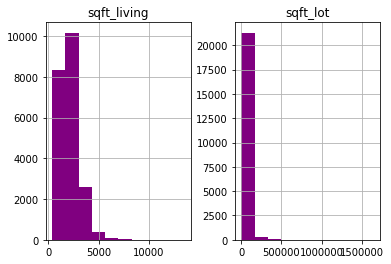

In [24]:
grade_predictors.hist(color='purple')

okay definitely need to normalize sqft of living and sqftlot but lets quickly check grade too

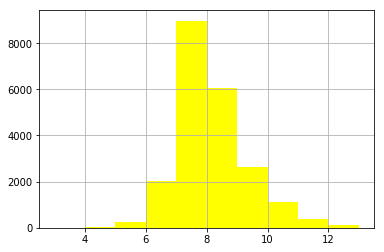

In [25]:
df.grade.hist(color='yellow')

I'd say that's pretty normal

In [26]:
log_lot = np.log(grade_predictors.sqft_lot)
log_living = np.log(grade_predictors.sqft_living)


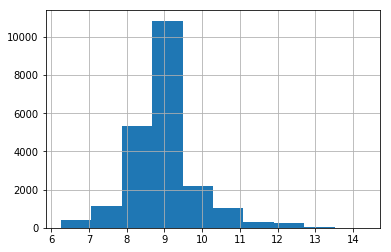

In [27]:
log_lot.hist()

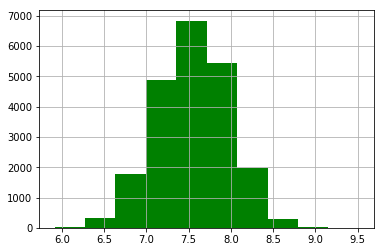

In [28]:
log_living.hist(color='green')

Great! Now lets use scatter plots to determine if there are any relationship between lotsize and livingsize with grade of the properties

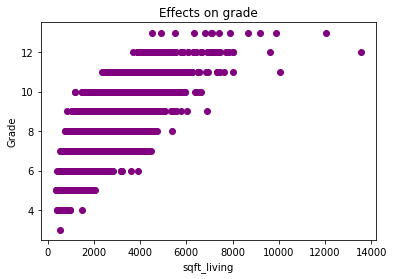

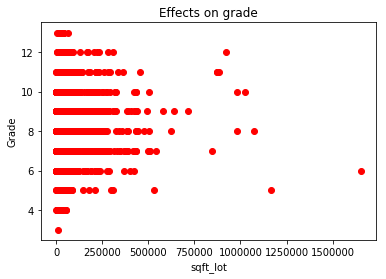

In [29]:
colors = ['purple', 'red']
z = 0
for x in grade_predictors:
    plt.scatter(grade_predictors[x], df.grade, color = colors[z], label = x)
    plt.title('Effects on grade')
    plt.legend
    plt.xlabel(x)
    plt.ylabel('Grade')
    plt.show()
    z +=1

Looking at the plots tells me that there is some relationship between the size of the house and grades. Although it's far from being perfectly linear you can see that as square feet increases the likelihood of a higher grade also increases. Furthermore,  it's clear that the highest grade you can achieve with a house <= 2,000 squarfeet is 10. Also, house > 7,000 you're pretty much guaranteed a grade above 10. As for lot square footage vs. grade there's no clear relationship between these two variables.

My intuition tells me that the older a house is the sooner it will need renovations. Let's see if there is any relationship between when a house was built and when(if) it renovated.

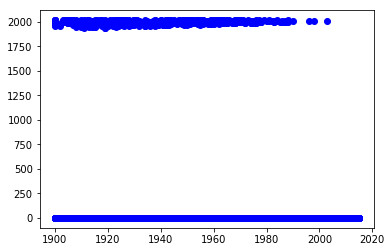

In [30]:
plt.scatter(df.yr_built, df.yr_renovated, color='blue')

Well that doesn't show us much of anything because there are so many houses that got renovated at year zero (haha), let's narrow down our data to only include houses that were renovated at all and see if there is a relaionship with yr built

In [31]:
x = df.loc[df["yr_renovated"]>0, ["yr_built"]]
y = df.loc[df["yr_renovated"]>0, ['yr_renovated']] 

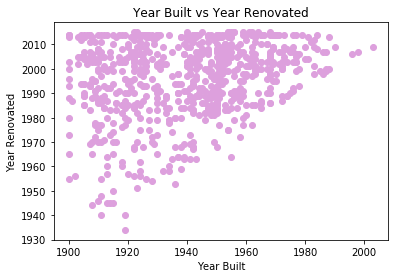

In [32]:
plt.scatter(x,y, color = 'plum')
plt.xlabel('Year Built')
plt.ylabel('Year Renovated')
plt.title('Year Built vs Year Renovated')

plt.show()

We cannot conclude that there is a direct relationship between the age of the house and the year that it was renovated but some observations can be made. 1) There are higher instances of renovations in houses built before 1960. 2) Houses tend to be renovated 10 - 20 years after they are built. 3) Except for houses built in the year 1900, in which case the first instance of a renovation made was in 1955 a whopping 55 years after the house was built. Either houses in the year 1900 were built really sturdy or people weren't as concerned with renovations back then. 

Let's move on to building our multiple linear regression model

# The assumptions of a linear regression model states the following

1) The distribution of all variables to be multivariate normal

2) Little to no multicollinearity in the data

3) The data is homeocedastic

4) The relationship between the independent and dependent variable must be linear

We will test this assumptions against the data to ultimatey determing which feature best predicts the outcome of our target variable, price

# Assumption 1: Little to no multicollinearity in our data 

In [33]:
abs(df.corr()) > 0.74

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


We see some true values for corr > .74, lets examine further

In [34]:
corr = pd.DataFrame([])
corr['living'] = df.sqft_living
corr['price'] =  df.price
corr['bathroom'] = df.bathrooms
corr['sq15'] =  df.sqft_living15
corr['sqabv'] = df.sqft_above
corr['grade'] = df.grade
corr.corr() 

,living,price,bathroom,sq15,sqabv,grade
living,1.000000,0.701917,0.755758,0.756402,0.876448,0.762779
price,0.701917,1.000000,0.525906,0.585241,0.605368,0.667951
bathroom,0.755758,0.525906,1.000000,0.569884,0.686668,0.665838
sq15,0.756402,0.585241,0.569884,1.000000,0.731767,0.713867
sqabv,0.876448,0.605368,0.686668,0.731767,1.000000,0.756073
grade,0.762779,0.667951,0.665838,0.713867,0.756073,1.000000


Correlations worth noting:
* sqft_living & bathroom have a correlation of 0.755758
* sqft_living & sqft_above have a correlation of 0.87644 
* sqft_living and sqft_living15 have a correlation of 0.876448 
* grade has a high correlation with sqft_above (.71), sqft_living(.76), sqft15(.71)

The variable, sqft_living, has the highest instances of collinearity with predictor variables so it may same instinct to remove this variable. However, sqft_living also has the highest correlation with price so instead I'm going to a drop all the other vars to eliminate multicollinearity.

In [35]:
df = df.drop(['sqft_living15', 'grade', 'sqft_above', 'bathrooms'], axis = 1)



In [36]:
abs(df.corr()) > 0.74 #just checking

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21f1e358>,
      dtype=object)

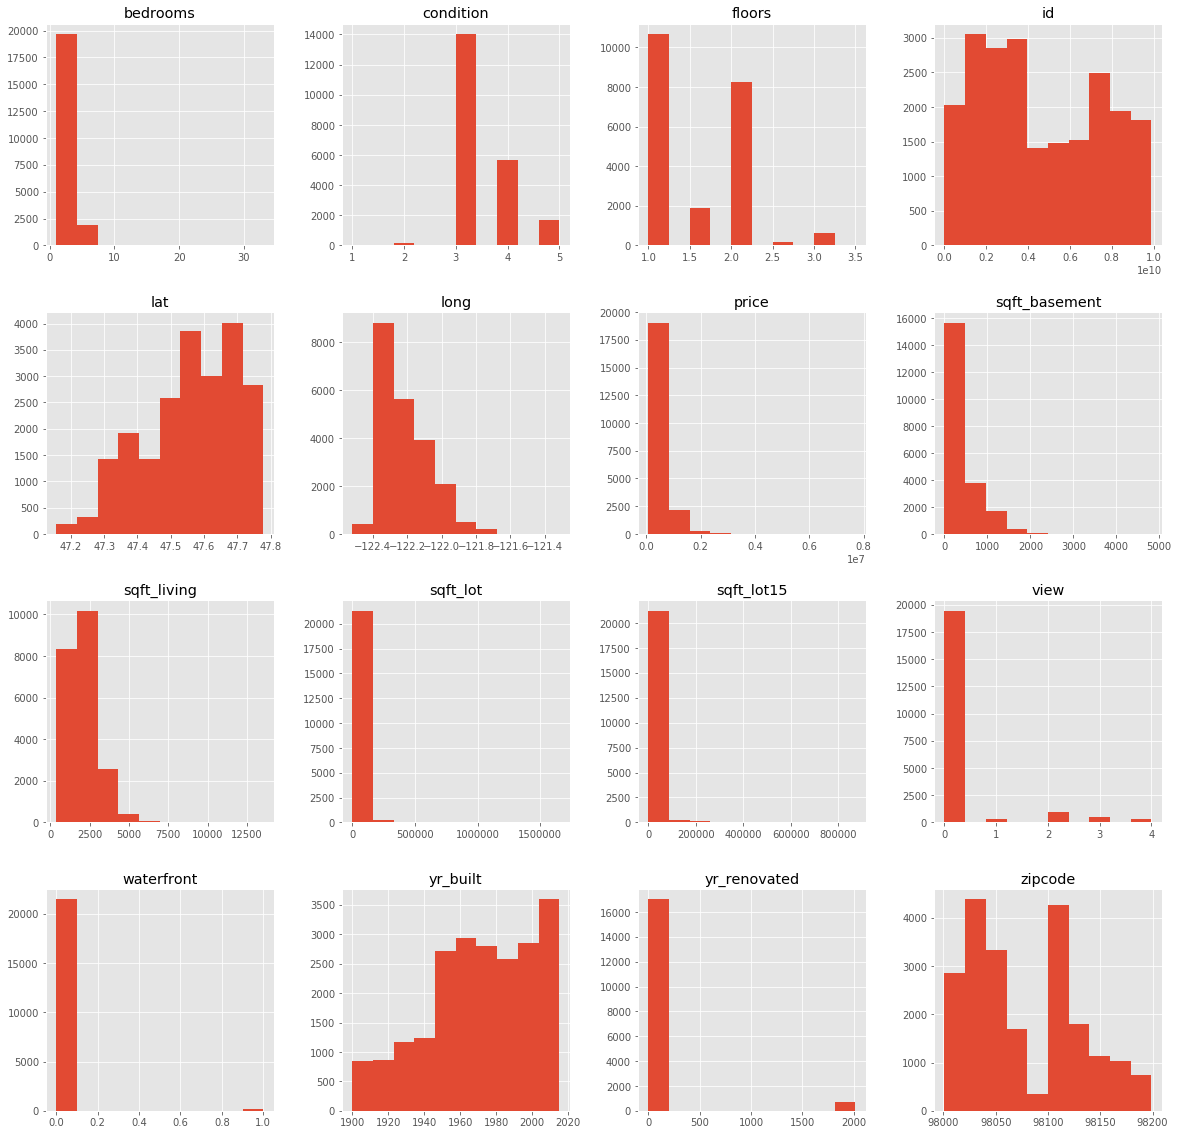

In [37]:
plt.style.use('ggplot')
df.hist(figsize=(20,20))

In [38]:
#histogram tells me most of the values for watefront is zero, lets confirm that
df['waterfront'].value_counts(normalize = True) 



0.0    0.99324
1.0    0.00676
Name: waterfront, dtype: float64

With a percentage of 99% of the series it's safe to say that having a waterfront view is a 'rare event'. This predictor can be removed as it can't contribute towards any significant prediction



In [39]:

df.yr_renovated.value_counts(normalize = True)


0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
1990.0    0.001239
2004.0    0.001239
2009.0    0.001183
1989.0    0.001126
2006.0    0.001126
2002.0    0.000957
1991.0    0.000901
1998.0    0.000901
1984.0    0.000901
1999.0    0.000845
2008.0    0.000845
2010.0    0.000845
2001.0    0.000845
1983.0    0.000845
2015.0    0.000789
1985.0    0.000789
1986.0    0.000789
1987.0    0.000789
1994.0    0.000789
1992.0    0.000732
1993.0    0.000676
1997.0    0.000676
1995.0    0.000676
            ...   
1975.0    0.000282
1964.0    0.000282
1969.0    0.000225
1963.0    0.000225
1973.0    0.000225
1981.0    0.000225
1965.0    0.000225
1978.0    0.000169
1960.0    0.000169
1958.0    0.000169
1956.0    0.000169
1955.0    0.000169
1945.0    0.000169
1972.0    0.000169
1967.0    0.000113
1957.0    0.000113
1940.0    0.000113
1974.0    0.000113
1962.0    0.000113
1953.0    0.000056
1950.0    0.000056
1934.0    0.

In [40]:
df.view.value_counts(normalize = True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

In [41]:
df.sqft_basement.value_counts(normalize = True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
400.0     0.008520
1000.0    0.006853
900.0     0.006575
300.0     0.006575
200.0     0.004862
750.0     0.004815
450.0     0.004769
530.0     0.004769
480.0     0.004769
720.0     0.004538
620.0     0.004167
580.0     0.003889
840.0     0.003843
420.0     0.003751
860.0     0.003658
670.0     0.003612
1100.0    0.003612
780.0     0.003519
550.0     0.003519
650.0     0.003473
240.0     0.003426
680.0     0.003380
380.0     0.003380
850.0     0.003334
360.0     0.003334
            ...   
2600.0    0.000046
2610.0    0.000046
276.0     0.000046
274.0     0.000046
1245.0    0.000046
143.0     0.000046
266.0     0.000046
862.0     0.000046
2180.0    0.000046
415.0     0.000046
243.0     0.000046
1135.0    0.000046
1525.0    0.000046
3000.0    0.000046
172.0     0.000046
225.0     0.000046
518.0     0.000046
935.0     0.000046
1920.0    0.000046
1930.0    0.000046
1990.0    0.000046
588.0     0.


Safe to drop waterfront, view, and yr renovated due to majority of the data being logged as zerooooooo

In [42]:
df = df.drop(['view', 'waterfront', 'yr_renovated'], axis = 1)

In [43]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')

Now lets examine some of the location vars. ie) zipcode, lat, and long

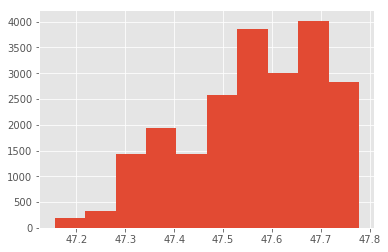

In [44]:
df.lat.hist()

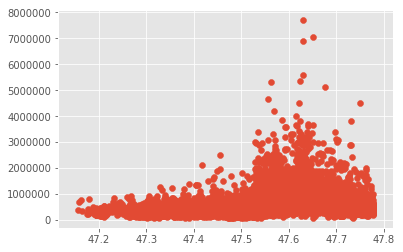

In [45]:
plt.scatter(df.lat, df.price)

No clear linearity here and I wouldn't call the data normalized. Furthermore, the data ranges through approx 1 degree of latitude, safe to drop. Lets check long

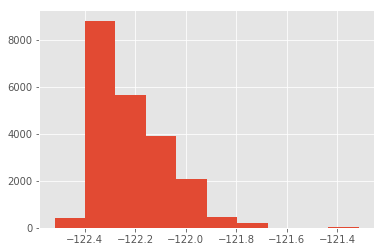

In [46]:
df.long.hist()

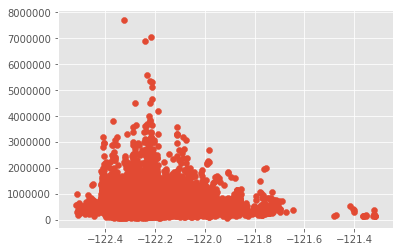

In [47]:
plt.scatter(df.long, df.price) #safe to say we can drop longitude also for the same reasons lets see zipcodes

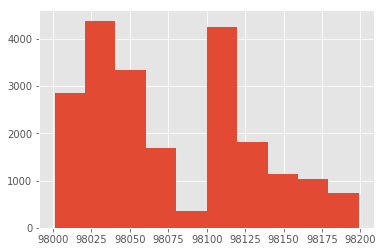

In [48]:
df.zipcode.hist()

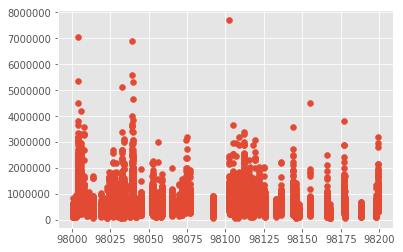

In [49]:
plt.scatter(df.zipcode, df.price) 

Again, zero linearity. Distribution is completely uneven. Worth it to remove.

In [50]:
df = df.drop(['zipcode','lat', 'long'], axis = 1)

In [51]:
#okay so what are we left with?
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'sqft_lot15'],
      dtype='object')

Off the bat...date would just be an impossible dataset to work with so lets go ahead and get rid of that too then check out scatter plots and histograms again


In [52]:
df = df.drop(['date'], axis = 1)

In [53]:
df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,sqft_lot15
0,7129300520,221900.0,3,1180,5650,1.0,3,0.0,1955,5650
1,6414100192,538000.0,3,2570,7242,2.0,3,400.0,1951,7639
2,5631500400,180000.0,2,770,10000,1.0,3,0.0,1933,8062
3,2487200875,604000.0,4,1960,5000,1.0,5,910.0,1965,5000
4,1954400510,510000.0,3,1680,8080,1.0,3,0.0,1987,7503


In [54]:
scatter = ['id', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'sqft_lot15']

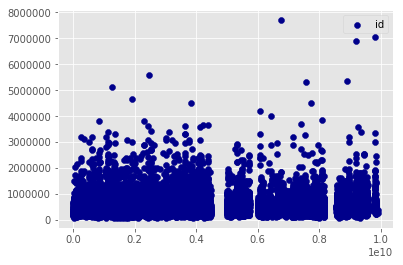

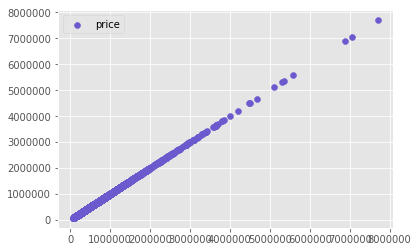

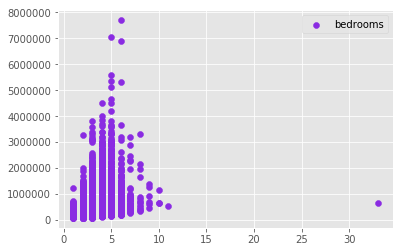

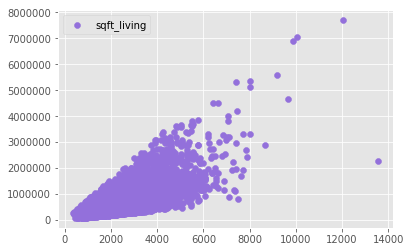

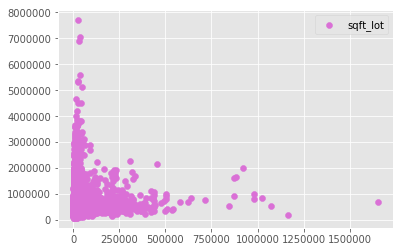

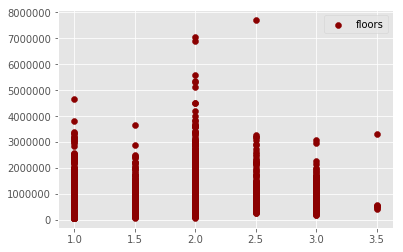

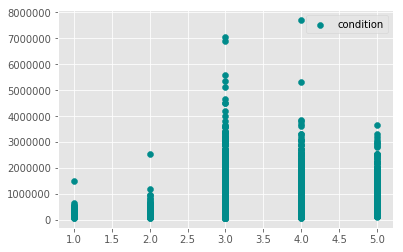

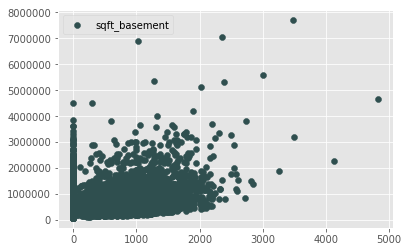

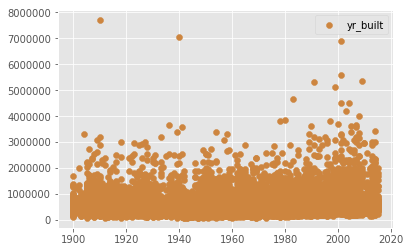

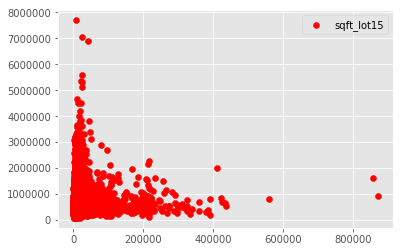

In [55]:
colors = ['darkblue', 'slateblue', 'blueviolet', 'mediumpurple', 'orchid','darkred', 'darkcyan', 'darkslategrey', 'peru', 'red']
i = 0 
for x in scatter:
    plt.scatter(df[x], df.price, label = x, color = colors[i] )
    plt.legend()
    plt.show()
    i+=1

Okay my original intuition was that the newer a house is the higher the price but that's clearly wrong. It's obvious that we can go ahead and drop that variable altogether because there is zero correlation (yr built that is). Same can be said about ID, furthermore we don't know enough about this predictor to keep it. Floors, condition, and bedrooms show the telltale lines of categorical data, however we do know that floors and bedrooms represent numerical features so it's safe to say they are not categorical. Conditions on the other hand definitely is and we'll create dummies for it. Removing some outliers from bedroom should create more defined linearity. There's clear linearity shown on sqftliving as expected from our correlation check. But first lets drop yr_built and ID then check histograms for normal distribution.

In [56]:
df = df.drop('yr_built', axis = 1)


In [57]:
df = df.drop('id', axis = 1)



# Assumption 2:  The distribution of all variables are normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23603438>,
      dtype=object)

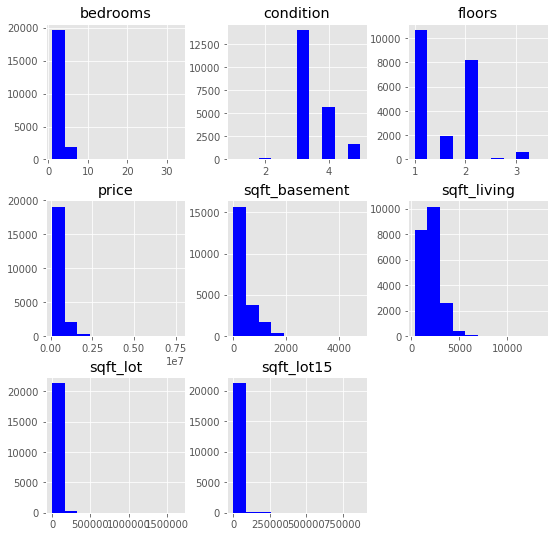

In [58]:
df.hist(figsize = (9,9), color = 'blue')

Okay the distribution for bedrooms, price, sqftbasement, sqftlivng, and both sqft lot need log transformation. Lets change condition into a categorical var and then get around to modeling :) 

In [59]:
data_log = pd.DataFrame([])
data_log['bedrooms'] = np.log(df['bedrooms'])
data_log['floors'] = df['floors']
data_log['sqft_lot'] = np.log(df['sqft_lot'])
data_log['price'] = np.log(df['price'])
data_log['sqft_living'] = np.log(df['sqft_living'])
data_log['sqft_lot15'] = np.log(df['sqft_lot15'])
#data_log['sqft_basement'] = np.log(df.sqft_basement)
data_log['condition'] = df.condition



Because there are zero values for sqft_basement it cannot be log normalized. We'll leave it as is for now

In [60]:
data_log['sqft_basement'] = df.sqft_basement

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c232ae7b8>,
      dtype=object)

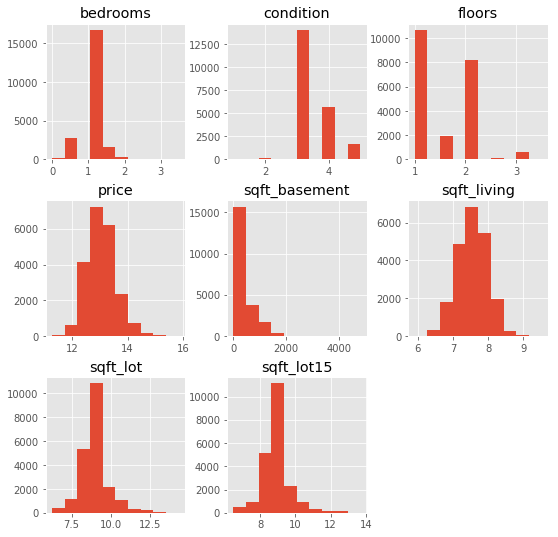

In [61]:
data_log.hist(figsize=(9,9))

Much Better! Now to make the condition feature a categorical one\\

In [62]:
condition_dummies = pd.get_dummies(data_log.condition)

In [63]:
data_log.columns


Index(['bedrooms', 'floors', 'sqft_lot', 'price', 'sqft_living', 'sqft_lot15',
       'condition', 'sqft_basement'],
      dtype='object')

In [64]:
data_log = data_log.drop(['condition'], axis = 1)

In [65]:
data_log = pd.concat([data_log, condition_dummies], axis=1)

In [66]:
data_log.head()

,bedrooms,floors,sqft_lot,price,sqft_living,sqft_lot15,sqft_basement,1,2,3,4,5
0,1.098612,1.0,8.639411,12.309982,7.073270,8.639411,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,13.195614,7.851661,8.941022,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,12.100712,6.646391,8.994917,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,13.311329,7.580700,8.517193,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,13.142166,7.426549,8.923058,0.0,0,0,1,0,0


In [67]:
data_log.info() #lets make sure my dummies are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
bedrooms         21597 non-null float64
floors           21597 non-null float64
sqft_lot         21597 non-null float64
price            21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot15       21597 non-null float64
sqft_basement    21597 non-null float64
1                21597 non-null uint8
2                21597 non-null uint8
3                21597 non-null uint8
4                21597 non-null uint8
5                21597 non-null uint8
dtypes: float64(7), uint8(5)
memory usage: 1.3 MB


In [68]:
for cat in data_log.iloc[:,7:].columns:
    data_log[cat] = data_log[cat].astype('category')

In [69]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
bedrooms         21597 non-null float64
floors           21597 non-null float64
sqft_lot         21597 non-null float64
price            21597 non-null float64
sqft_living      21597 non-null float64
sqft_lot15       21597 non-null float64
sqft_basement    21597 non-null float64
1                21597 non-null category
2                21597 non-null category
3                21597 non-null category
4                21597 non-null category
5                21597 non-null category
dtypes: category(5), float64(7)
memory usage: 1.3 MB


In [70]:

data_log = data_log.rename({1:'condition1', 2: 'condition2', 3: 'condition3', 4: 'condition4', 5: 'condition5'}, axis=1)

In [71]:
data_log.head()

,bedrooms,floors,sqft_lot,price,sqft_living,sqft_lot15,sqft_basement,condition1,condition2,condition3,condition4,condition5
0,1.098612,1.0,8.639411,12.309982,7.073270,8.639411,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,13.195614,7.851661,8.941022,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,12.100712,6.646391,8.994917,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,13.311329,7.580700,8.517193,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,13.142166,7.426549,8.923058,0.0,0,0,1,0,0


# Assumption 3 and 4

3) The data is homeocedastic


4) The relationship between the independent and dependent variable must be linear

Now that we have narrowed our data down to four predictors for our target, price. Our next step would be to see which of our four predictors best meet these assumptions

In [72]:
features = data_log.copy()

In [73]:
features = features.drop(['price'], axis = 1)
features.head()

,bedrooms,floors,sqft_lot,sqft_living,sqft_lot15,sqft_basement,condition1,condition2,condition3,condition4,condition5
0,1.098612,1.0,8.639411,7.073270,8.639411,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,7.851661,8.941022,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,6.646391,8.994917,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,7.580700,8.517193,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,7.426549,8.923058,0.0,0,0,1,0,0


Lets use visualizations to see how our well features meet assumptions 3 and 4

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricebedrooms
-------------------------------------------------------------------------------------


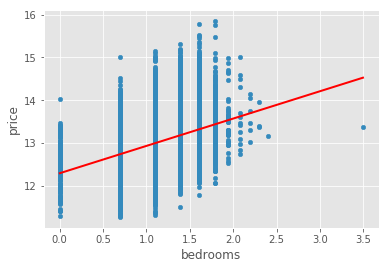

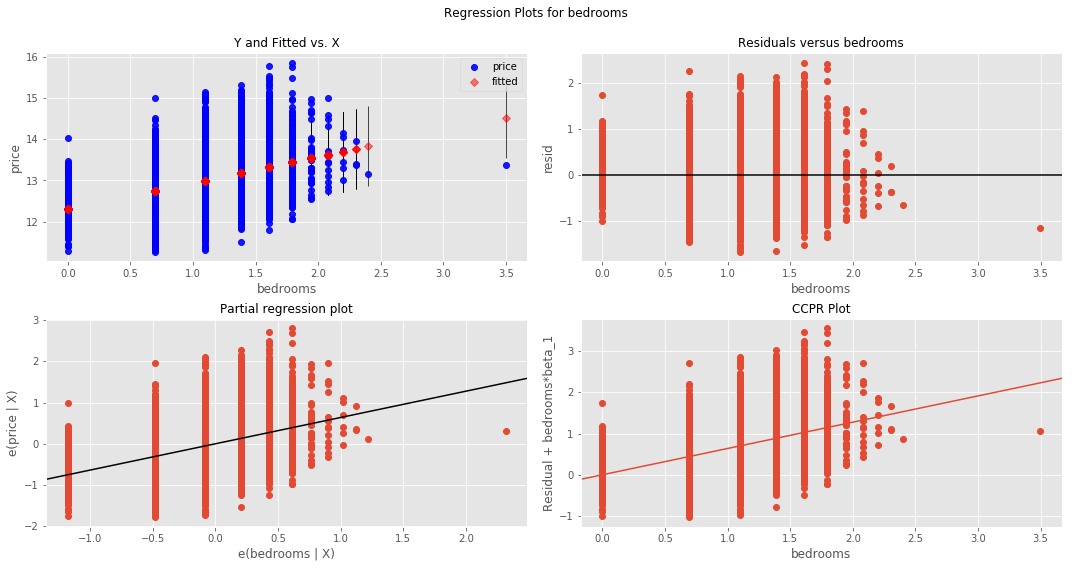

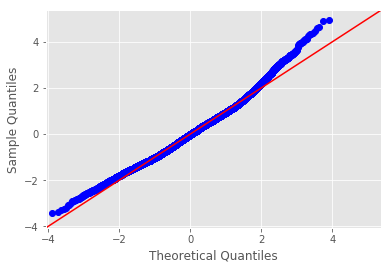

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricefloors
-------------------------------------------------------------------------------------


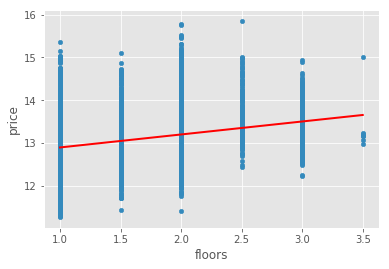

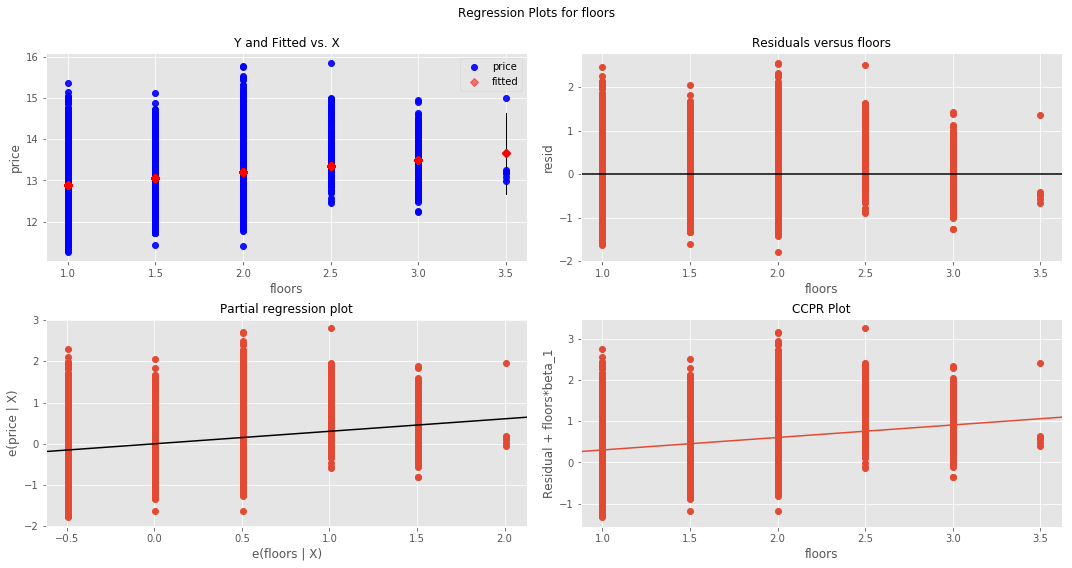

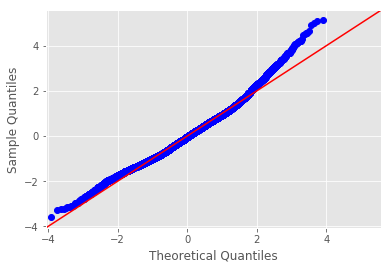

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_lot
-------------------------------------------------------------------------------------


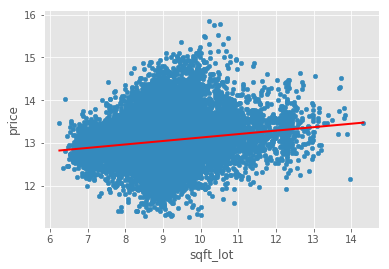

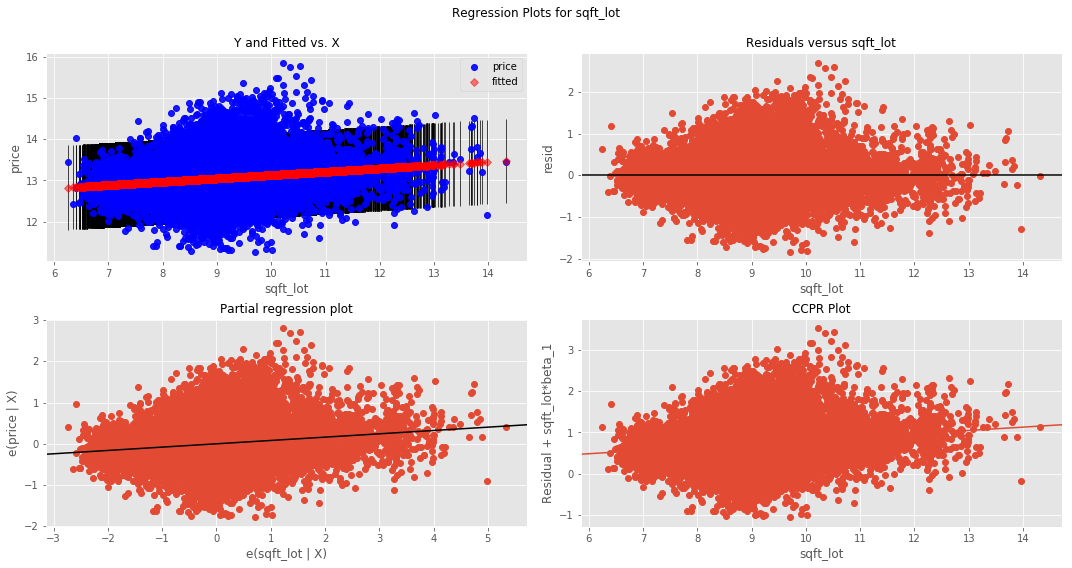

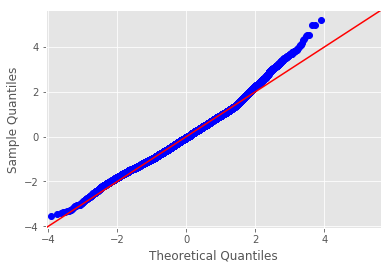

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_living
-------------------------------------------------------------------------------------


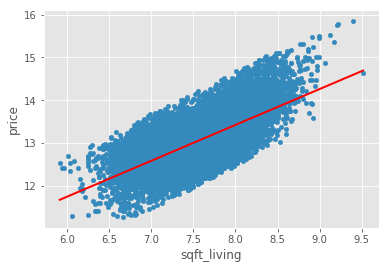

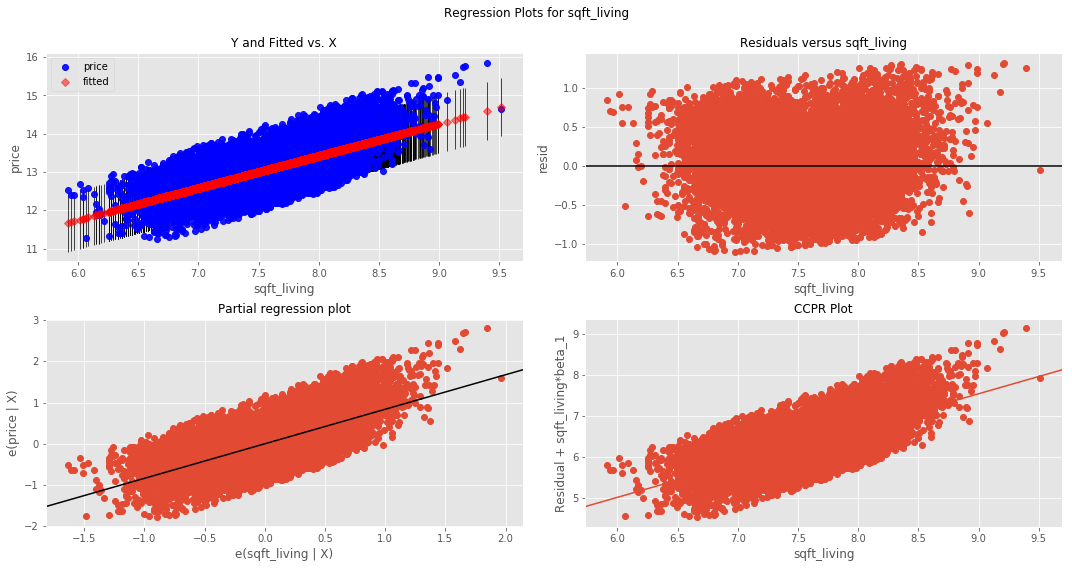

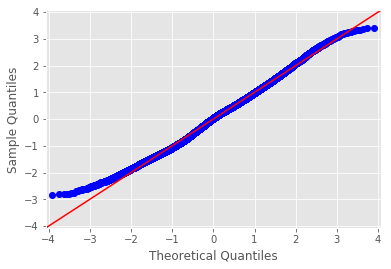

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_lot15
-------------------------------------------------------------------------------------


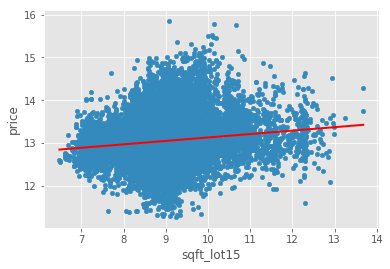

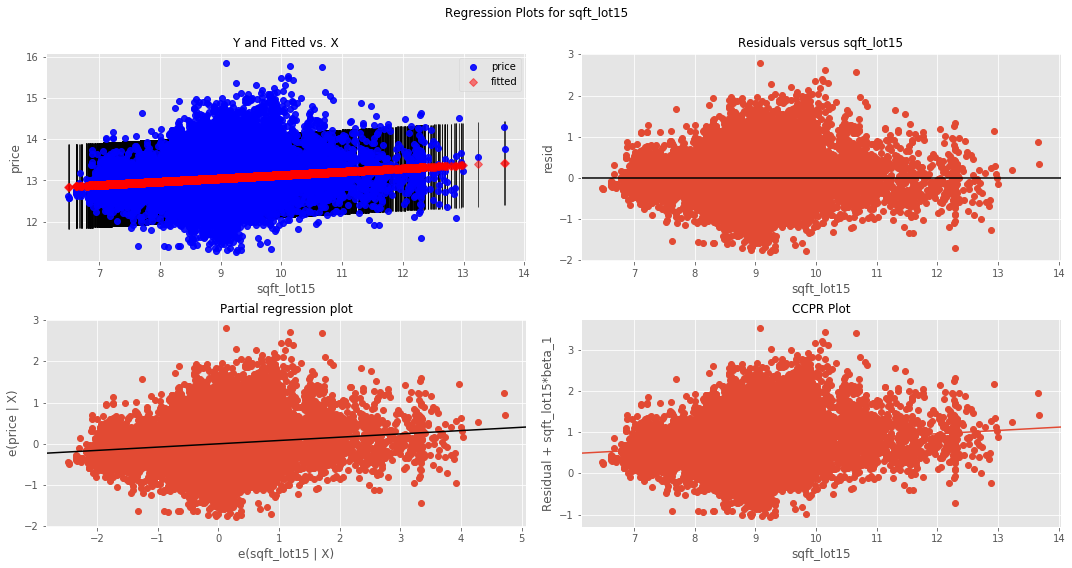

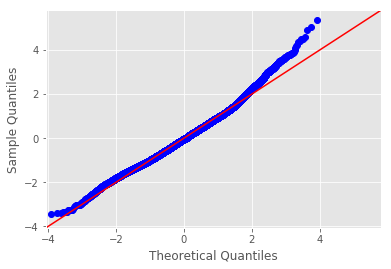

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_basement
-------------------------------------------------------------------------------------


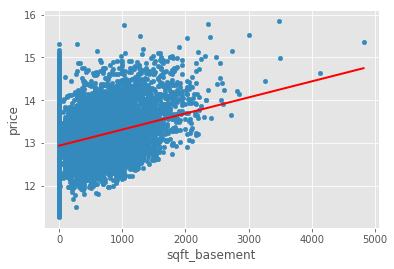

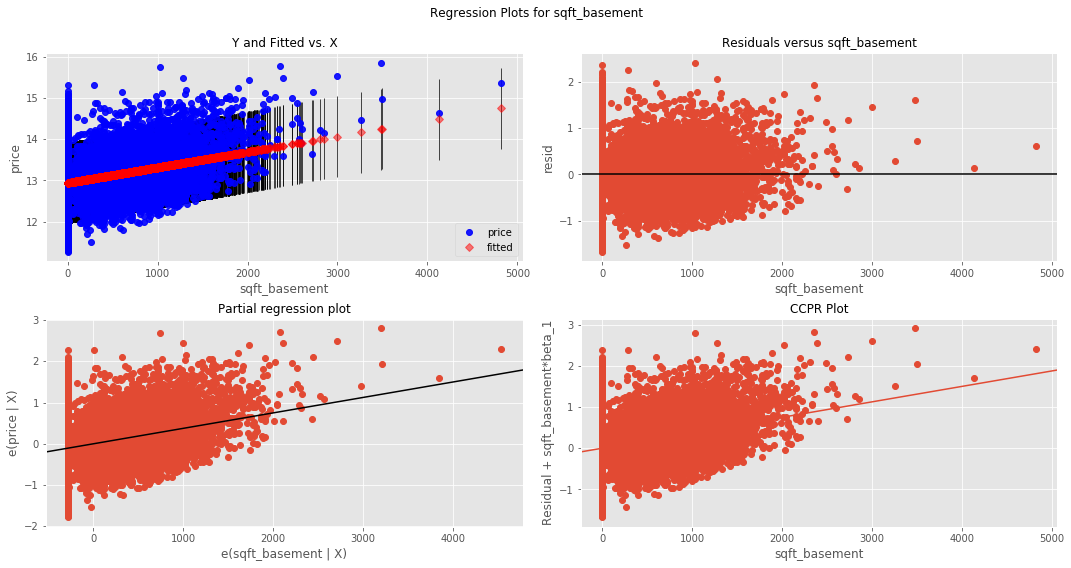

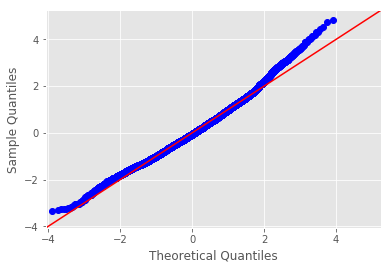

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

features = features.drop(['condition1','condition2','condition3','condition4','condition5'], axis = 1)

for idx, val in enumerate(features):
    print ("KC Housing DataSet - Regression Analysis and Diagnostics for formula: price" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
   
    model = smf.ols(formula=f, data=data_log).fit()
    
    X_new = pd.DataFrame({val: [data_log[val].min(), data_log[val].max()]});
    preds = model.predict(X_new)
    data_log.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    

#### Examining the graphs above:
1) The Q-Q plots show us that all of the variables have normal distribution

2) The residuals plot shows homeoscedasicity among all the variables except for bedrooms. I find that it's evenly distributed enough to keep it though

3) The scatter plots show us only one variable can truly be described as linear, sqft_living. There is slight linearity in the other features however so I'll hold on to them for now.

We're down to 11 predictors. Now I will build 4 different models contaning: 3,5,7,all features respectively. I will use RFE to determine which features to include in my first three model and then I'll print the rsquared values of each model to determine which model is most reliable. First, I'll check for multi-collinearity since we haven't checked since log-normalization

In [75]:
data_log.corr() #looks like sqft_lot and lot15 are correlated. I'll drop sqft_lot15 since it has a lower corr factor than sft_lot

,bedrooms,floors,sqft_lot,price,sqft_living,sqft_lot15,sqft_basement
bedrooms,1.000000,0.190985,0.195969,0.342850,0.648121,0.175649,0.279614
floors,0.190985,1.000000,-0.237460,0.310630,0.367564,-0.227223,-0.241866
sqft_lot,0.195969,-0.237460,1.000000,0.138261,0.325983,0.918665,0.092895
price,0.342850,0.310630,0.138261,1.000000,0.674802,0.123710,0.313119
sqft_living,0.648121,0.367564,0.325983,0.674802,1.000000,0.303058,0.417212
sqft_lot15,0.175649,-0.227223,0.918665,0.123710,0.303058,1.000000,0.079840
sqft_basement,0.279614,-0.241866,0.092895,0.313119,0.417212,0.079840,1.000000


In [76]:
data_log = data_log.drop(['sqft_lot15'],axis=1)

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
data_f = data_log.drop(['price'], axis = 1)
linreg = LinearRegression()
selector1 = RFE(linreg, n_features_to_select = 3)
selector1 = selector1.fit(data_f, data_log["price"])

selector2 =  RFE(linreg, n_features_to_select = 5)
selector2 = selector2.fit(data_f, data_log["price"])

selector3 = RFE(linreg, n_features_to_select = 7)
selector3 = selector3.fit(data_f, data_log["price"])




In [78]:
data_f.columns

Index(['bedrooms', 'floors', 'sqft_lot', 'sqft_living', 'sqft_basement',
       'condition1', 'condition2', 'condition3', 'condition4', 'condition5'],
      dtype='object')

In [79]:
print(selector1.support_)
print(selector2.support_)
print(selector3.support_)


[ True False False  True False False  True False False False]
[ True False False  True False  True  True False False  True]
[ True  True False  True False  True  True False  True  True]


In [80]:
model1_data = data_log
model1_data = model1_data.drop(['floors', 'sqft_lot','sqft_basement', 'condition1', 'condition3', 'condition4', 'condition5'], axis = 1)
outcome = 'price'
predictor = model1_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model1 = smf.ols(formula = formula, data=model1_data).fit()

model2_data = data_log
model2_data = model2_data.drop(['floors', 'sqft_lot','sqft_basement','condition3', 'condition4',], axis = 1)
outcome = 'price'
predictor = model2_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model2 = smf.ols(formula = formula, data=model2_data).fit()

model3_data = data_log
model3_data = model3_data.drop(['sqft_lot','sqft_basement','condition3'], axis = 1)
outcome = 'price'
predictor = model3_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model3 = smf.ols(formula = formula, data=model3_data).fit()

outcome = 'price'
predictor = data_log.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model4 = smf.ols(formula = formula, data=data_log).fit() 


In [81]:
print('Model 1 Rsquared:', model1.rsquared)
print('Model 2 Rsquared:', model2.rsquared)
print('Model 3 Rsquared:', model3.rsquared)
print('Model 4 Rsquared:', model4.rsquared)

Model 1 Rsquared: 0.47185075125863785
Model 2 Rsquared: 0.47783262168593055
Model 3 Rsquared: 0.4850682926806327
Model 4 Rsquared: 0.49163534350804083


We see that the rsquared gets higher as we add more predictors. Although, not by a lot it still seems like the right model would include all 11 of our features in it. Our final model will include all four features


In [82]:
final_model = model4

In [83]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     2320.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:05:16   Log-Likelihood:                -9486.2
No. Observations:               21597   AIC:                         1.899e+04
Df Residuals:                   21587   BIC:                         1.907e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.4447      0.051    106.383      0.000       5.344       5.545
condition1[T.1]     1.0060      0.059     17.027      0.000       0.890       1.122
condition2[T.1]     0.9533      0.028     33.695      0.000       0.898       1.009
condition3[T.1]     1.0810      0.017     63.677      0.000       1.048       1.114
condition4[T.1]     1.1478      0.017     67.672      0.000       1.115       1.181
condition5[T.1]     1.2565      0.018     69.919      0.000       1.221       1.292
bedrooms           -0.3124      0.012    -26.186      0.000      -0.336      -0.289
floors              0.0869      0.007     12.920      0.000       0.074       0.100
sqft_lot           -0.0372      0.003    -10.740      0.000      -0.044      -0.030
sqft_living         0.9330      0.011     85.713      0.000       0.912       0.954
sqft_basement    6.847e-05   7.63e-06      8.976      0.000    5.35e-05    8.34e-05
==============================================================================
Omnibus:                       79.547   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.122
Skew:                           0.146   Prob(JB):                     4.00e-18
Kurtosis:                       2.935   Cond. No.                     7.49e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Warning number 2 states: The smallest eigenvalue is 7.52e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular. We checked for multicollinearity, lets check to see if model3 throws the same error

In [84]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2905.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:05:16   Log-Likelihood:                -9624.8
No. Observations:               21597   AIC:                         1.927e+04
Df Residuals:                   21589   BIC:                         1.933e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.1951      0.054    114.980      0.000       6.090       6.301
condition1[T.1]    -0.1006      0.070     -1.430      0.153      -0.238       0.037
condition2[T.1]    -0.1490      0.029     -5.083      0.000      -0.206      -0.092
condition4[T.1]     0.0651      0.006     10.467      0.000       0.053       0.077
condition5[T.1]     0.1892      0.010     19.158      0.000       0.170       0.209
bedrooms           -0.3082      0.012    -25.732      0.000      -0.332      -0.285
floors              0.0876      0.005     16.268      0.000       0.077       0.098
sqft_living         0.9343      0.008    110.815      0.000       0.918       0.951
==============================================================================
Omnibus:                       97.604   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.839
Skew:                           0.152   Prob(JB):                     9.37e-22
Kurtosis:                       2.878   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like we'll be using model3 as our final model instead

In [85]:
final_model = model3

So in this model we find that the feature that has the most desirable impact on price is sqft_living. Now, we'll run a model with the variables we previously dropped due to their high collinearity with sqft_living, they are 'sqft_living15', 'grade', 'sqft_above', 'bathrooms'. In this model we will omit sqft_living. 

In [86]:
ndf = data_log

In [87]:
ndf.head()

,bedrooms,floors,sqft_lot,price,sqft_living,sqft_basement,condition1,condition2,condition3,condition4,condition5
0,1.098612,1.0,8.639411,12.309982,7.073270,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,13.195614,7.851661,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,12.100712,6.646391,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,13.311329,7.580700,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,13.142166,7.426549,0.0,0,0,1,0,0


In [88]:
ndf = ndf.drop(['sqft_living'], axis = 1)

In [89]:
ndf.head()


,bedrooms,floors,sqft_lot,price,sqft_basement,condition1,condition2,condition3,condition4,condition5
0,1.098612,1.0,8.639411,12.309982,0.0,0,0,1,0,0
1,1.098612,2.0,8.887653,13.195614,400.0,0,0,1,0,0
2,0.693147,1.0,9.210340,12.100712,0.0,0,0,1,0,0
3,1.386294,1.0,8.517193,13.311329,910.0,0,0,0,0,1
4,1.098612,1.0,8.997147,13.142166,0.0,0,0,1,0,0


In [90]:
df2 = pd.read_csv('kc_house_data.csv')
ndf['sqft_living15'] = df2.sqft_living15
ndf['grade'] = df2.grade
ndf['sqft_above'] = df2.sqft_above
ndf['bathrooms'] = df2.bathrooms
ndf.head()

,bedrooms,floors,sqft_lot,price,sqft_basement,condition1,condition2,condition3,condition4,condition5,sqft_living15,grade,sqft_above,bathrooms
0,1.098612,1.0,8.639411,12.309982,0.0,0,0,1,0,0,1340,7,1180,1.00
1,1.098612,2.0,8.887653,13.195614,400.0,0,0,1,0,0,1690,7,2170,2.25
2,0.693147,1.0,9.210340,12.100712,0.0,0,0,1,0,0,2720,6,770,1.00
3,1.386294,1.0,8.517193,13.311329,910.0,0,0,0,0,1,1360,7,1050,3.00
4,1.098612,1.0,8.997147,13.142166,0.0,0,0,1,0,0,1800,8,1680,2.00


In [91]:
abs(ndf.corr())>.74 #check for multicollinearity. Grade and sqft_above are multicollinear. Let's delete grade as it is categorical

,bedrooms,floors,sqft_lot,price,sqft_basement,sqft_living15,grade,sqft_above,bathrooms
bedrooms,True,False,False,False,False,False,False,False,False
floors,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False
price,False,False,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False
sqft_living15,False,False,False,False,False,True,False,False,False
grade,False,False,False,False,False,False,True,True,False
sqft_above,False,False,False,False,False,False,True,True,False
bathrooms,False,False,False,False,False,False,False,False,True


In [92]:
ndf = ndf.drop(['grade'], axis = 1)

In [93]:
abs(ndf.corr()) > .74

,bedrooms,floors,sqft_lot,price,sqft_basement,sqft_living15,sqft_above,bathrooms
bedrooms,True,False,False,False,False,False,False,False
floors,False,True,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False
price,False,False,False,True,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False
sqft_living15,False,False,False,False,False,True,False,False
sqft_above,False,False,False,False,False,False,True,False
bathrooms,False,False,False,False,False,False,False,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c234782e8>,
      dtype=object)

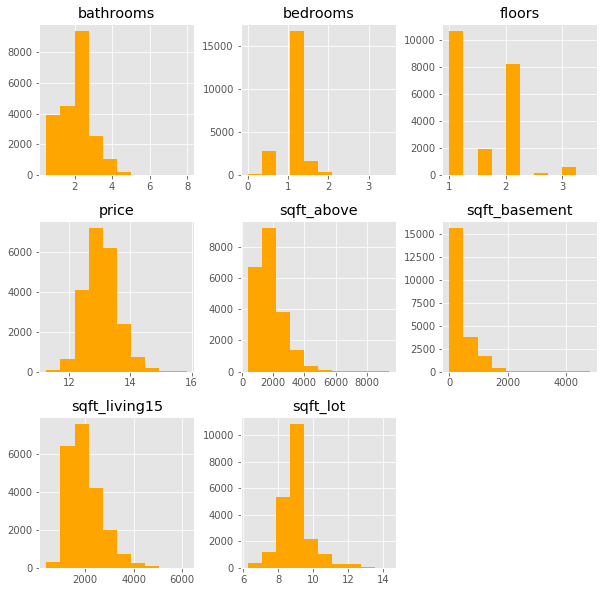

In [94]:
ndf.hist(figsize=(10,10), color = 'orange')

In [95]:
log_ndf = ndf
log_ndf['bathrooms'] = np.log(ndf.bathrooms)
log_ndf['sqft_above'] = np.log(ndf.sqft_above)
log_ndf['sqft_living15'] = np.log(ndf.sqft_living15)

#all of our other predictors are already log normalized lets do the same with newly added ones


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c271c7b70>,
      dtype=object)

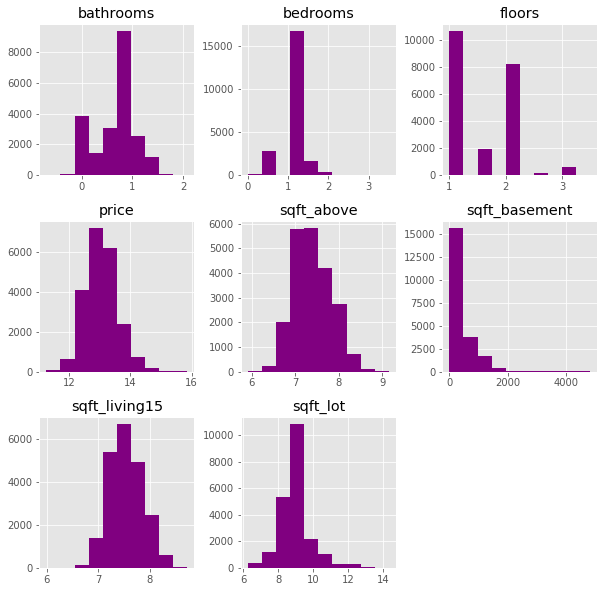

In [96]:
log_ndf.hist(figsize = (10,10), color = 'purple')

In [97]:
# check for multicollinearity after log-normalizing
abs(log_ndf.corr()) > .74

,bedrooms,floors,sqft_lot,price,sqft_basement,sqft_living15,sqft_above,bathrooms
bedrooms,True,False,False,False,False,False,False,False
floors,False,True,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False
price,False,False,False,True,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False
sqft_living15,False,False,False,False,False,True,False,False
sqft_above,False,False,False,False,False,False,True,False
bathrooms,False,False,False,False,False,False,False,True



We have 12 predictors here, we'll run the same RFE as before testing for rsquared for 4, 8, 12 predictors to see which yields the highest rsquared values 

In [98]:
data_f2 = log_ndf.drop(['price'], axis = 1)
linreg = LinearRegression()

selector4 = RFE(linreg, n_features_to_select = 4)
selector4 = selector4.fit(data_f2, log_ndf["price"])

selector5 =  RFE(linreg, n_features_to_select = 8)
selector5 = selector5.fit(data_f2, log_ndf["price"])

print(data_f2.columns)
print(selector4.support_)
print(selector5.support_)



Index(['bedrooms', 'floors', 'sqft_lot', 'sqft_basement', 'condition1',
       'condition2', 'condition3', 'condition4', 'condition5', 'sqft_living15',
       'sqft_above', 'bathrooms'],
      dtype='object')
[False False False False  True False False False False  True  True  True]
[ True False False False  True  True False  True  True  True  True  True]


In [99]:
model5_data = log_ndf
model5_data= model5_data.drop(['bedrooms', 'floors', 'sqft_lot', 'sqft_basement','condition2', 'condition3', 'condition4', 'condition5'], axis = 1)
outcome = 'price'
predictor = model5_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model5 = smf.ols(formula = formula, data=model5_data).fit()

model6_data = log_ndf
model6_data= model6_data.drop(['floors', 'sqft_lot', 'sqft_basement', 'condition3'], axis = 1)
outcome = 'price'
predictor = model6_data.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model6 = smf.ols(formula = formula, data=model6_data).fit()


outcome = 'price'
predictor = log_ndf.drop(['price'], axis = 1)
pred_sum = '+' .join(predictor)
formula = outcome + '~' + pred_sum
model7 = smf.ols(formula = formula, data=log_ndf).fit() 



In [100]:
print('Model 5 Rsquared:', model5.rsquared)
print('Model 6 Rsquared:', model6.rsquared)
print('Model 7 Rsquared:', model7.rsquared)

Model 5 Rsquared: 0.43143847805565194
Model 6 Rsquared: 0.4490464106393971
Model 7 Rsquared: 0.5246312319525641


In [101]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     2166.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:05:20   Log-Likelihood:                -8761.5
No. Observations:               21597   AIC:                         1.755e+04
Df Residuals:                   21585   BIC:                         1.764e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8296      0.061     79.072      0.000       4.710       4.949
condition1[T.1]     0.7997      0.058     13.804      0.000       0.686       0.913
condition2[T.1]     0.8399      0.028     29.685      0.000       0.784       0.895
condition3[T.1]     0.9719      0.018     55.333      0.000       0.938       1.006
condition4[T.1]     1.0451      0.018     59.182      0.000       1.011       1.080
condition5[T.1]     1.1729      0.018     63.966      0.000       1.137       1.209
bedrooms           -0.2336      0.011    -20.355      0.000      -0.256      -0.211
floors              0.0720      0.007     10.325      0.000       0.058       0.086
sqft_lot           -0.0663      0.003    -19.188      0.000      -0.073      -0.060
sqft_basement       0.0004   7.14e-06     54.980      0.000       0.000       0.000
sqft_living15       0.4523      0.012     38.435      0.000       0.429       0.475
sqft_above          0.6038      0.012     48.622      0.000       0.579       0.628
bathrooms          -0.0158      0.010     -1.516      0.129      -0.036       0.005
==============================================================================
Omnibus:                       34.375   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.744
Skew:                           0.084   Prob(JB):                     4.71e-08
Kurtosis:                       2.905   Cond. No.                     9.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.35e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     2199.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:05:20   Log-Likelihood:                -10355.
No. Observations:               21597   AIC:                         2.073e+04
Df Residuals:                   21588   BIC:                         2.080e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3559      0.077     83.050      0.000       6.206       6.506
condition1[T.1]    -0.2255      0.073     -3.097      0.002      -0.368      -0.083
condition2[T.1]    -0.1776      0.030     -5.859      0.000      -0.237      -0.118
condition4[T.1]     0.0767      0.006     12.157      0.000       0.064       0.089
condition5[T.1]     0.2400      0.010     23.622      0.000       0.220       0.260
bedrooms           -0.0884      0.012     -7.521      0.000      -0.111      -0.065
sqft_living15       0.5700      0.012     48.438      0.000       0.547       0.593
sqft_above          0.3105      0.011     29.434      0.000       0.290       0.331
bathrooms           0.2436      0.010     24.775      0.000       0.224       0.263
==============================================================================
Omnibus:                      126.609   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.683
Skew:                           0.170   Prob(JB):                     8.42e-28
Kurtosis:                       2.849   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model6 does not throw any singularity or multicollinearity errors so we'll use that as our second final model

In [103]:
final_model2 = model6

# Visualizing our second model

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricebedrooms
-------------------------------------------------------------------------------------


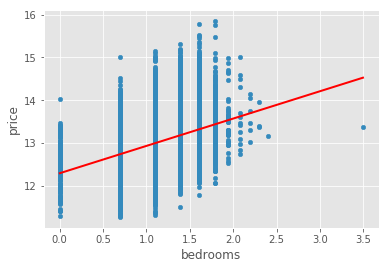

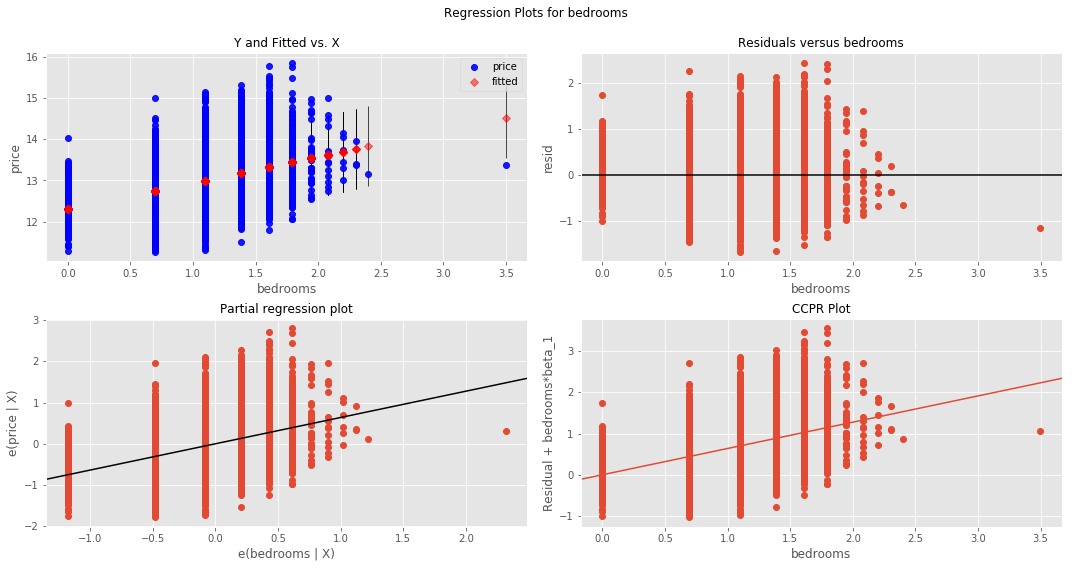

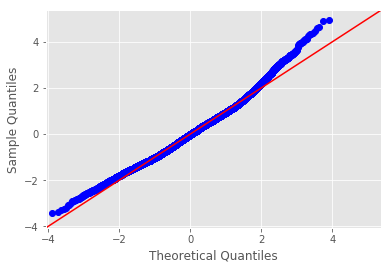

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_living15
-------------------------------------------------------------------------------------


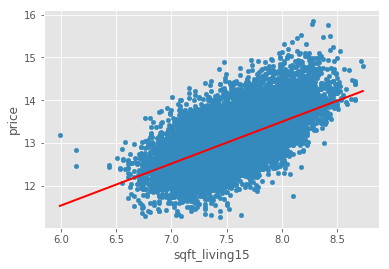

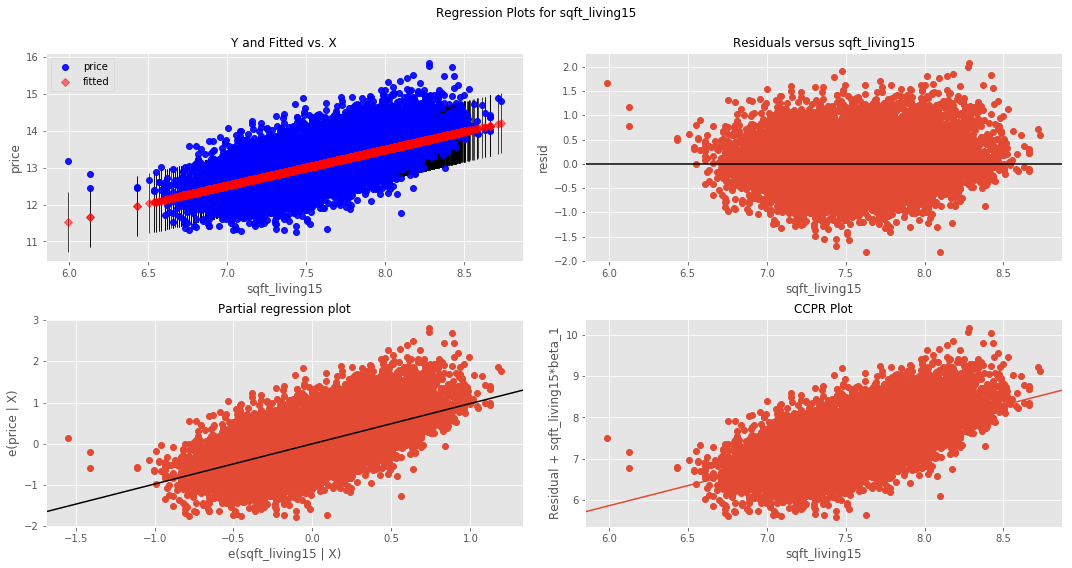

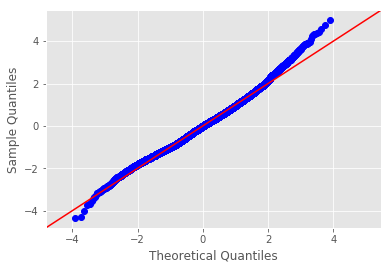

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricesqft_above
-------------------------------------------------------------------------------------


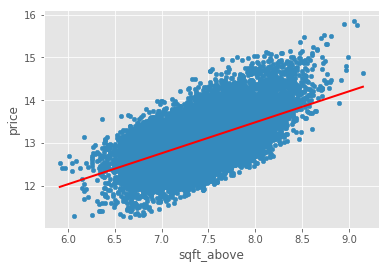

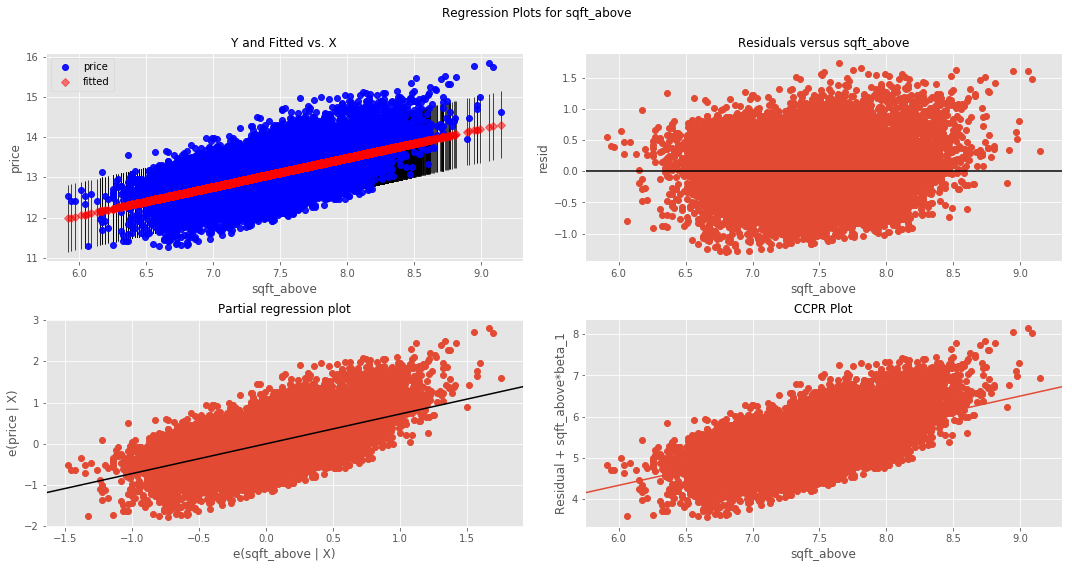

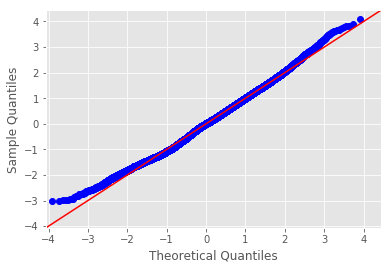

KC Housing DataSet - Regression Analysis and Diagnostics for formula: pricebathrooms
-------------------------------------------------------------------------------------


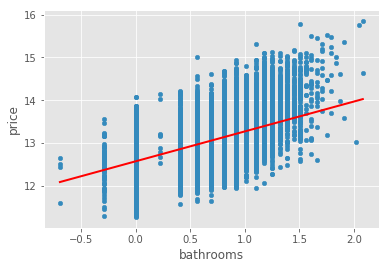

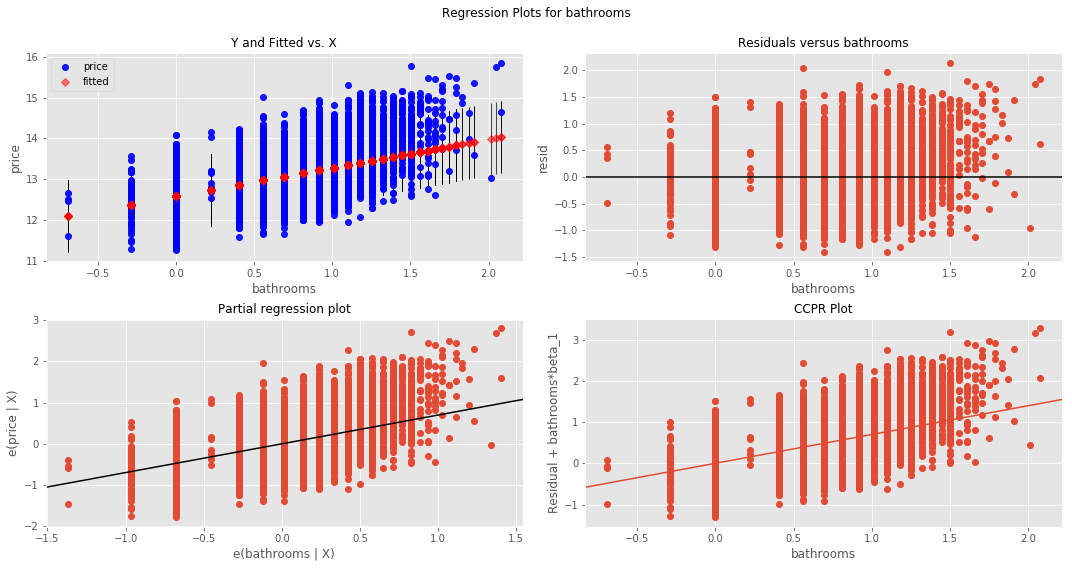

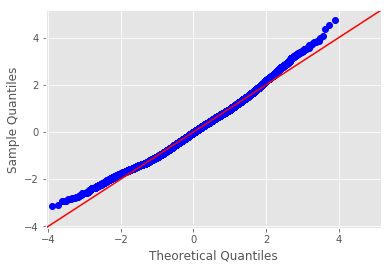

In [107]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

features = model6_data.drop(['condition1','condition2', 'condition4','condition5','price'], axis = 1)

for idx, val in enumerate(features):
    print ("KC Housing DataSet - Regression Analysis and Diagnostics for formula: price" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
   
    model = smf.ols(formula=f, data=model6_data).fit()
    
    X_new = pd.DataFrame({val: [model6_data[val].min(), model6_data[val].max()]});
    preds = model.predict(X_new)
    model6_data.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()

In [104]:
print('First model paramaters: \n' , final_model.params)
print('-------------------------------------------------')
print('Second model paramaters: \n' , final_model2.params)




First model paramaters: 
 Intercept          6.195141
condition1[T.1]   -0.100598
condition2[T.1]   -0.148985
condition4[T.1]    0.065115
condition5[T.1]    0.189184
bedrooms          -0.308180
floors             0.087599
sqft_living        0.934276
dtype: float64
-------------------------------------------------
Second model paramaters: 
 Intercept          6.355869
condition1[T.1]   -0.225530
condition2[T.1]   -0.177604
condition4[T.1]    0.076715
condition5[T.1]    0.240012
bedrooms          -0.088395
sqft_living15      0.570025
sqft_above         0.310520
bathrooms          0.243558
dtype: float64


In [105]:
print(final_model.rsquared)

0.4850682926806327


In summation, we obtained a dataset of King County house sales that illustrated the price of properties in this county vs. features including : 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors',waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15'. 

Scrubbing the data involved examining if there were any null values or placeholder values that might skew our analysis. In this step of the process we found that some series had been incorrectly cast as strings and that there were a few series with null values present. We scrubbed our data by replacing null-values with median values and casting series as the correct datatypes

In the exploration phase of the analysis I first checked for multicollinearity between features. I found that the bathroom, sqft_above, and sqft_living15 had high correlation with sqft_living. Although the easier choice would have been to drop the sqft_living dataset I also noticed that this feature had the highest correlation with price which led me to decide to keep it and drop the other three. I then compared histograms all across and dropped the year, waterfront, and view features as most of the data logged had a value of '0' making these events rare and neglible when predicting price. After that I examined features pertaining to location. Examination of their histograms and plots showed irregular distribution all across and little to no linearity leading me to drop these features as well. I noticed that floors, bathrooms, and condition had scatterplots that the telltale plots of categorical data. Floors and bedrooms showed are obviously representative of numerical data. I then log-normalized our remaining features and created categorical dummies out of conditions. Sqft_lot 15 was multicollinear with sqft_lot after log normalization so it was removed.

I then ran an RFE to help select the best: 3, 5, 7 features and ran three different models with these features and fourth with all 10 features and compared r-squared. Although running a model with all 10 features yielded the highest Rsquared-values, it also threw singularity and multicollinear errors so I ultimately used my model with 7 features. This model had an rsquared of .48. Here are the coeffecients from that model:

First model paramaters: 
 
 Intercept          6.287743


condition1[T.1]   -0.103345


condition2[T.1]   -0.150840


condition4[T.1]    0.063569


condition5[T.1]    0.187248


bedrooms          -0.310003


floors             0.128145


sqft_living        0.933963


Key things to note: these are all log normalized features therefore a 1% increase in the independent variable yields the coefficent percent increase in the dependent variable, price.

Adding bedrooms have a negative impact on price.
Increasing square footage of living space by 10% yields an increase of 9.3% in price on average
Adding a floor, (aka increasing square-footage) yields an increase of 12% in price


I wasn't thrilled by the Rsquared of the first model so I ran a second model with all the variables I had omitted due to collinearity issues with sqft_living to see if I could get a higher Rsquared. Using the same methodology as my first model my second model yielded he following results:

Second model paramaters: 


Intercept          6.355869


condition1[T.1]   -0.225530


condition2[T.1]   -0.177604


condition4[T.1]    0.076715


condition5[T.1]    0.240012


bedrooms          -0.088395


sqft_living15      0.570025


sqft_above         0.310520


bathrooms          0.243558

Key things to note here:

Every 10% increase in living space yields an increase of price by 5.7% on average
Adding a bathroom 
Specifically any increase in living space above ground (non-basement) yields an increase of price by 31% on average


Ultimately my second model did not have a higher rsquared but the model did present some interesting findings which will be included in my keynote. Overall, it seems that a stakeholder will benefit by increasing square-footage, bathrooms, and floors of their properties.
